<a href="https://colab.research.google.com/github/VoXuanLanh/BT_fuzzy_Logic/blob/main/Vietnamese_Dishes_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cài đặt Kaggle
!pip install -q kaggle

In [2]:
# Upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vxunlanzz","key":"fbb5836fd9d1fe9d043b0f5a27b7c58a"}'}

In [3]:
# Tạo thư mục và di chuyển file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d quandang/vietnamese-foods

Dataset URL: https://www.kaggle.com/datasets/quandang/vietnamese-foods
License(s): CC-BY-NC-SA-4.0


In [5]:
!unzip -q vietnamese-foods.zip -d vietnamese_food

In [6]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data_path = "/content/vietnamese_food/Images"
classes = sorted([
    folder for folder in os.listdir(data_path)
    if os.path.isdir(os.path.join(data_path, folder))
])
print("Số lớp:", len(classes))
print("Danh sách lớp:", classes)


Số lớp: 3
Danh sách lớp: ['Test', 'Train', 'Validate']


In [7]:
img_size = 64
train_dirs = ["/content/vietnamese_food/Images/Train", "/content/vietnamese_food/Images/Validate"]

X, y = [], []
class_names = []

for base_dir in train_dirs:
    print(f" + kiểm tra thư mục: {base_dir}")
    for label in os.listdir(base_dir):
        folder = os.path.join(base_dir, label)
        if os.path.isdir(folder):
            num_imgs = len([
                f for f in os.listdir(folder)
                if f.lower().endswith(('.jpg', '.jpeg', '.png'))
            ])
            print(f" - {label} có {num_imgs} ảnh")


 + kiểm tra thư mục: /content/vietnamese_food/Images/Train
 - Bun bo Hue có 1071 ảnh
 - Bun thit nuong có 522 ảnh
 - Banh duc có 463 ảnh
 - Banh trang nuong có 556 ảnh
 - Banh beo có 451 ảnh
 - Pho có 564 ảnh
 - Banh chung có 354 ảnh
 - Banh pia có 310 ảnh
 - Bun rieu có 805 ảnh
 - Goi cuon có 598 ảnh
 - Banh canh có 674 ảnh
 - Banh mi có 935 ảnh
 - Mi quang có 618 ảnh
 - Banh can có 520 ảnh
 - Hu tieu có 688 ảnh
 - Banh gio có 448 ảnh
 - Com tam có 659 ảnh
 - Xoi xeo có 366 ảnh
 - Banh cuon có 798 ảnh
 - Cao lau có 432 ảnh
 - Chao long có 751 ảnh
 - Banh xeo có 821 ảnh
 - Banh tet có 480 ảnh
 - Ca kho to có 473 ảnh
 - Banh bot loc có 503 ảnh
 - Nem chua có 379 ảnh
 - Bun dau mam tom có 640 ảnh
 - Banh khot có 584 ảnh
 - Canh chua có 577 ảnh
 - Bun mam có 541 ảnh
 + kiểm tra thư mục: /content/vietnamese_food/Images/Validate
 - Bun bo Hue có 153 ảnh
 - Bun thit nuong có 75 ảnh
 - Banh duc có 66 ảnh
 - Banh trang nuong có 80 ảnh
 - Banh beo có 65 ảnh
 - Pho có 81 ảnh
 - Banh chung có 50 

In [8]:
train_dir = "/content/vietnamese_food/Images/Train"
val_dir = "/content/vietnamese_food/Images/Validate"

# Load ảnh theo từng class
def load_images_from_folder(base_dir):
    X, y = [], []
    classes = sorted(os.listdir(base_dir))
    for label in classes:
        folder = os.path.join(base_dir, label)
        if not os.path.isdir(folder):
            continue
        for img_name in os.listdir(folder):
            if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(folder, img_name)
                try:
                    img = cv2.imread(img_path)
                    img = cv2.resize(img, (img_size, img_size))
                    X.append(img)
                    y.append(label)
                except:
                    continue
    return np.array(X), np.array(y)

X_train, y_train = load_images_from_folder(train_dir)
X_val, y_val = load_images_from_folder(val_dir)

print("Số ảnh train:", len(X_train))
print("Số ảnh val:", len(X_val))


Số ảnh train: 17581
Số ảnh val: 2515


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

# One-hot encoding
num_classes = len(le.classes_)
y_train = to_categorical(y_train_encoded, num_classes=num_classes)
y_val = to_categorical(y_val_encoded, num_classes=num_classes)

# Chuẩn hóa ảnh
X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 3)
X_val = X_val.reshape(X_val.shape[0], img_size, img_size, 3)
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

# ✅ In thông tin lớp
print("Số lớp:", len(le.classes_))
print("Tên lớp:", le.classes_)

print(X_train.shape)
print(len(y_train))
print(X_train.ndim)
print(X_val.shape)
print(len(y_val))
print(X_val.ndim)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

Số lớp: 30
Tên lớp: ['Banh beo' 'Banh bot loc' 'Banh can' 'Banh canh' 'Banh chung' 'Banh cuon'
 'Banh duc' 'Banh gio' 'Banh khot' 'Banh mi' 'Banh pia' 'Banh tet'
 'Banh trang nuong' 'Banh xeo' 'Bun bo Hue' 'Bun dau mam tom' 'Bun mam'
 'Bun rieu' 'Bun thit nuong' 'Ca kho to' 'Canh chua' 'Cao lau' 'Chao long'
 'Com tam' 'Goi cuon' 'Hu tieu' 'Mi quang' 'Nem chua' 'Pho' 'Xoi xeo']
(17581, 64, 64, 3)
17581
4
(2515, 64, 64, 3)
2515
4


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Flatten(input_shape=(img_size, img_size, 3)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(216, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=50)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


440/440 ━━━━━━━━━━━━━━━━━━━━ 24s 47ms/step - accuracy: 0.0540 - loss: 4.3811 - val_accuracy: 0.0608 - val_loss: 3.3757
Epoch 2/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.0576 - loss: 3.3763 - val_accuracy: 0.0608 - val_loss: 3.3637
Epoch 3/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.0630 - loss: 3.3635 - val_accuracy: 0.0608 - val_loss: 3.3603
Epoch 4/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.0631 - loss: 3.3596 - val_accuracy: 0.0608 - val_loss: 3.3597
Epoch 5/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.0618 - loss: 3.3589 - val_accuracy: 0.0608 - val_loss: 3.3595
Epoch 6/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.0622 - loss: 3.3590 - val_accuracy: 0.0608 - val_loss: 3.3594
Epoch 7/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.0612 - loss: 3.3575 - val_accuracy: 0.0608 - val_loss: 3.3594
Epoch 8/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.0581 - loss: 3.3665 - val_accurac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Dự đoán: Bun bo Hue
Độ tin cậy: 0.0611314


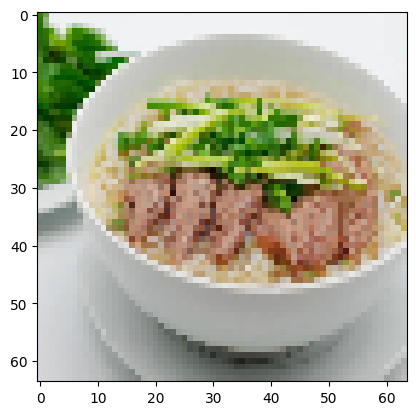

In [20]:
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
img=load_img('/content/pho-8658.jpg',target_size=(64,64))
plt.imshow(img)
img_array=img_to_array(img)/255
img_flatten=img_array.reshape(1,64,64,3)
prediction=model.predict(img_flatten)
predicted_index = int(np.argmax(prediction))
confidence = np.max(prediction)

print("Dự đoán:", le.classes_[predicted_index])
print("Độ tin cậy:", confidence)


In [21]:
model.save("lan3.keras")